# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
import pandas as pd
df = pd.read_csv("D:/BaiduNetdiskDownload/028光伏数据/028光伏数据/218-Site_9A-Solibro.csv")
# df_new = df.head(105115)
df_new = df.head(105115)
df_new.to_csv('wind.csv',index = False)
df1 = df_new.drop(['timestamp'], axis = 1)
df1 = df1.drop(['Wind_Speed'], axis = 1)
df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df1.to_csv('data/test2.csv', sep = ',', index = False)
# print(df1.dtypes)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94339 entries, 0 to 105114
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Active_Energy_Delivered_Received  94339 non-null  float64
 1   Current_Phase_Average             94339 non-null  float64
 2   Active_Power                      94339 non-null  float64
 3   Performance_Ratio                 94339 non-null  float64
 4   Weather_Temperature_Celsius       94339 non-null  float64
 5   Weather_Relative_Humidity         94339 non-null  float64
 6   Global_Horizontal_Radiation       94339 non-null  float64
 7   Diffuse_Horizontal_Radiation      94339 non-null  float64
 8   Wind_Direction                    94339 non-null  float64
 9   Weather_Daily_Rainfall            94339 non-null  float64
 10  Radiation_Global_Tilted           94339 non-null  float64
 11  Radiation_Diffuse_Tilted          94339 non-null  float64
dtypes: 

In [2]:
import pandas as pd
df = pd.read_excel("data\merged_data.xlsx")
df = df.drop(['Datetime'], axis = 1)
df.to_csv('data/merged_data.xlsx', sep = ',', index = False)
# print(df1.dtypes)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Speed10       672 non-null    float64
 1   Direction10   672 non-null    float64
 2   Speed30       672 non-null    float64
 3   Direction30   672 non-null    float64
 4   Speed50       672 non-null    float64
 5   Direction50   672 non-null    float64
 6   Speed70       672 non-null    float64
 7   Direction70   672 non-null    float64
 8   Speed90       672 non-null    float64
 9   Direction90   672 non-null    float64
 10  Speed100      672 non-null    float64
 11  Direction100  672 non-null    float64
 12  Temper        672 non-null    float64
 13  Pressure      672 non-null    float64
 14  Humidity      672 non-null    float64
 15  Power(MW)     672 non-null    float64
dtypes: float64(16)
memory usage: 84.1 KB
None


In [2]:
import pandas as pd
df = pd.read_csv("data\merged_data_GF.csv")
df = df.drop(['Datetime'], axis = 1)
df.to_csv('data/merged_data_GF.csv', sep = ',', index = False)
# print(df1.dtypes)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Power(MW)    672 non-null    float64
 1   Irradiance   672 non-null    float64
 2   Speed10      672 non-null    float64
 3   Direction10  672 non-null    float64
 4   Temper       672 non-null    float64
 5   Pressure     672 non-null    float64
 6   Humidity     672 non-null    float64
dtypes: float64(7)
memory usage: 36.9 KB
None


In [3]:
import pandas as pd
df = pd.read_csv("D:/BaiduNetdiskDownload/028光伏数据/10-Site_2.csv")
# df_new = df.head(105116)
df_new = df.head(105116)
df_new.to_csv('data/test1.csv',index = False)
filled_data = df_new.interpolate()  #插值填充
df1 = filled_data.drop(['timestamp'], axis = 1)
# df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) delete none
df1.to_csv('data/test1.csv', sep = ',', index = False)
# print(df1.dtypes)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105116 entries, 0 to 105115
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Current_Phase_Average_Mean        105116 non-null  float64
 1   Active_Energy_Delivered_Received  105116 non-null  float64
 2   Active_Power                      105116 non-null  float64
 3   Wind_Speed                        105116 non-null  float64
 4   Weather_Temperature_Celsius       105116 non-null  float64
 5   Global_Horizontal_Radiation       105116 non-null  float64
 6   Wind_Direction                    105116 non-null  float64
 7   Weather_Daily_Rainfall            105116 non-null  float64
 8   Max_Wind_Speed                    105116 non-null  float64
 9   Air_Pressure                      105116 non-null  float64
 10  Hail_Accumulation                 105116 non-null  float64
 11  Pyranometer_1                     105116 non-null  f

In [3]:
import pandas as pd
df = pd.read_csv("D:/Googledownload/TimeGAN-master/gen_data/generated_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.794581,0.094999,0.813691,1.0,1.0,0.008072,1.0,1.0,1.0,1.0,1.0,0.007283,0.158416,0.196660
1,0.706561,0.106241,0.719720,1.0,1.0,0.008804,1.0,1.0,1.0,1.0,1.0,0.010012,0.213931,0.258766
2,0.754146,0.107032,0.770395,1.0,1.0,0.009242,1.0,1.0,1.0,1.0,1.0,0.010907,0.221899,0.268978
3,0.687082,0.101483,0.704768,1.0,1.0,0.007184,1.0,1.0,1.0,1.0,1.0,0.008003,0.175448,0.216185
4,0.753056,0.111587,0.767375,1.0,1.0,0.009080,1.0,1.0,1.0,1.0,1.0,0.011965,0.251408,0.296529


In [2]:
import pandas as pd

# 读取 CSV 文件
file_path = 'D:\Googledownload\TimeGAN-master\data\combined_generated_data.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)
num_columns = data.shape[1]
print(num_columns)

1471288


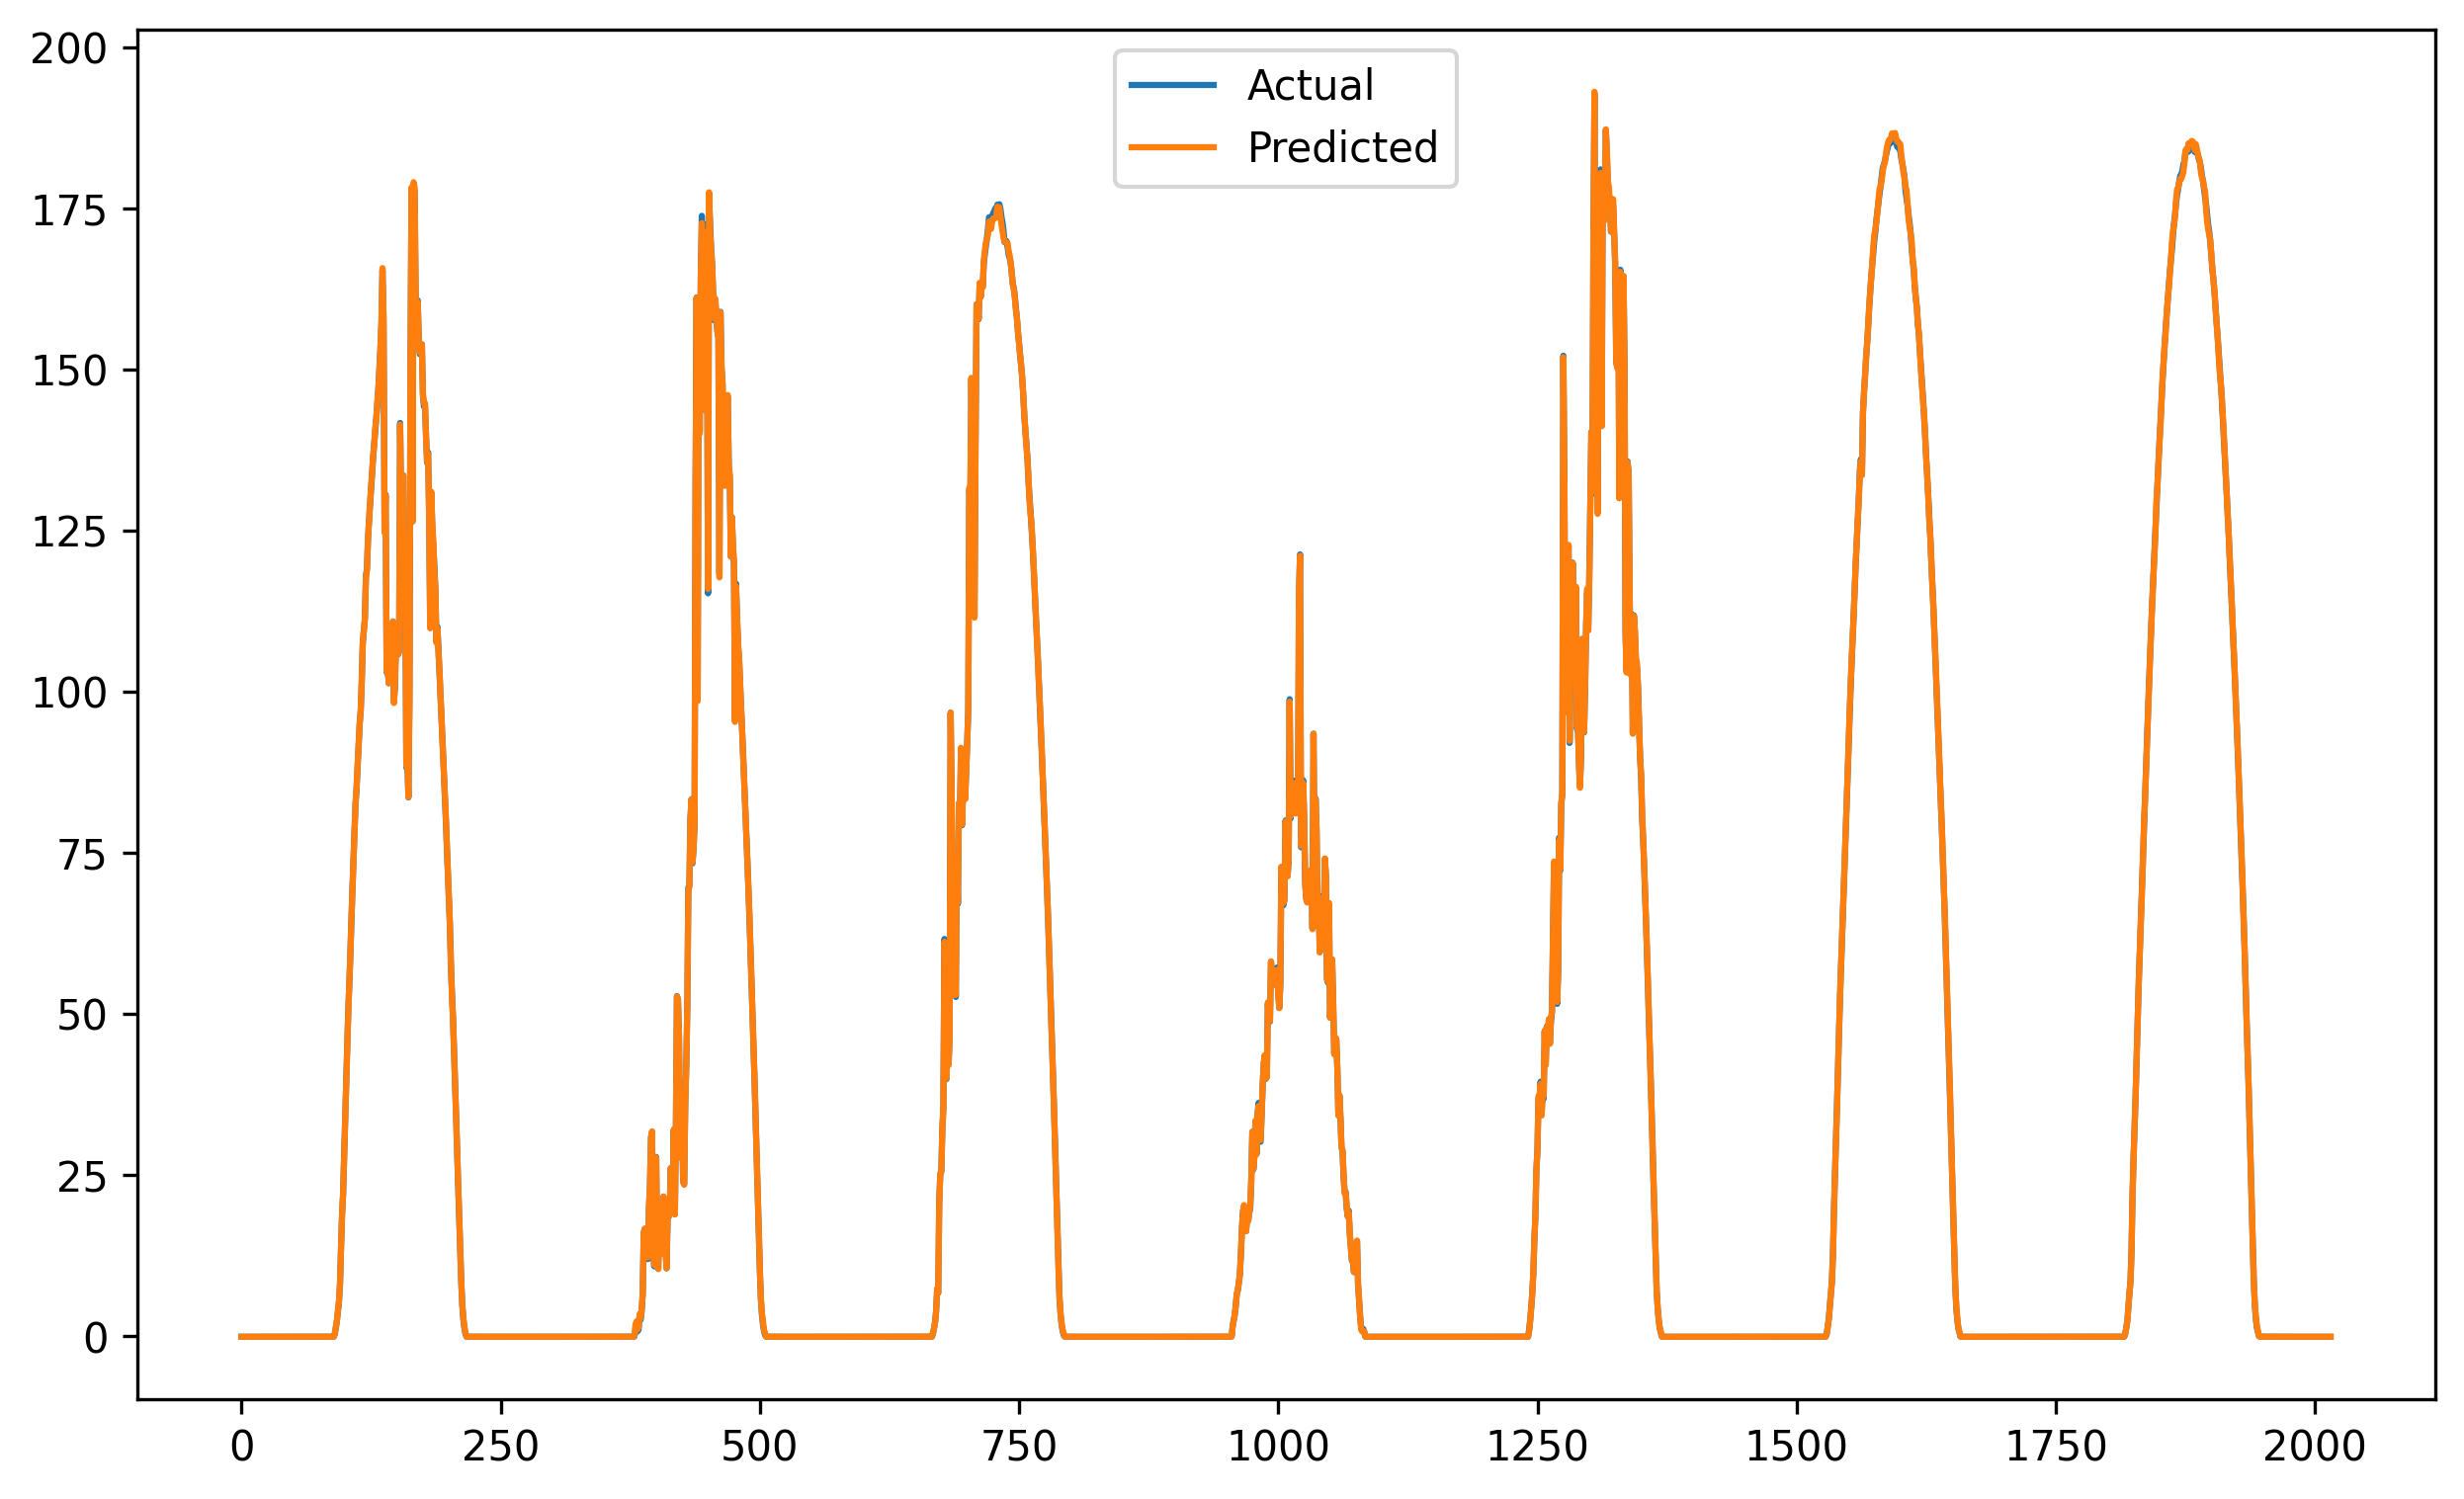

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
csv_file_path = 'ori_data/rf_result_data.csv'  # 替换为你的 CSV 文件路径
gfdata = pd.read_csv(csv_file_path)

# 提取 x 和 y 列数据
x_values = gfdata.index
y1_values = gfdata['Actual']  # 第一条曲线的 y 值
y2_values = gfdata['Predicted']  # 第2条曲线的 y 值


# 绘制两条曲线
plt.figure(dpi=300,figsize=(10,6))
plt.plot(x_values, y1_values, label='Actual')
plt.plot(x_values, y2_values, label='Predicted')


# # 添加标题和标签
# plt.title('Comparison of Two Lines from CSV Data')
# plt.xlabel('X Axis Label')
# plt.ylabel('Y Axis Label')

# 显示图例
plt.legend()

# 显示图表
plt.show()

In [7]:
# 查找空值所在行列
import csv

# 打开 CSV 文件
with open('D:/BaiduNetdiskDownload/028光伏数据/028光伏数据/10-Site_2.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    row_num = 0
    # 遍历每一行
    for row in reader:
        col_num = 0 
        # 遍历每一列
        for value in row:
            if value.strip() == '':
                print(f'空值在行 {row_num + 1} 的列 {col_num + 1}')
            col_num += 1
        row_num += 1
            

空值在行 2740 的列 5
空值在行 2740 的列 6
空值在行 2740 的列 7
空值在行 2740 的列 8
空值在行 2740 的列 9
空值在行 2740 的列 10
空值在行 2740 的列 11
空值在行 2740 的列 12
空值在行 2740 的列 13
空值在行 2740 的列 14
空值在行 2740 的列 15
空值在行 11959 的列 2
空值在行 11959 的列 3
空值在行 11959 的列 4
空值在行 11960 的列 2
空值在行 11960 的列 3
空值在行 11960 的列 4
空值在行 11961 的列 2
空值在行 11961 的列 3
空值在行 11961 的列 4
空值在行 11962 的列 2
空值在行 11962 的列 3
空值在行 11962 的列 4
空值在行 11963 的列 2
空值在行 11963 的列 3
空值在行 11963 的列 4
空值在行 11964 的列 2
空值在行 11964 的列 3
空值在行 11964 的列 4
空值在行 11965 的列 2
空值在行 11965 的列 3
空值在行 11965 的列 4
空值在行 11966 的列 2
空值在行 11966 的列 3
空值在行 11966 的列 4
空值在行 11967 的列 2
空值在行 11967 的列 3
空值在行 11967 的列 4
空值在行 11968 的列 2
空值在行 11968 的列 3
空值在行 11968 的列 4
空值在行 11969 的列 2
空值在行 11969 的列 3
空值在行 11969 的列 4
空值在行 11970 的列 2
空值在行 11970 的列 3
空值在行 11970 的列 4
空值在行 11971 的列 2
空值在行 11971 的列 3
空值在行 11971 的列 4
空值在行 11972 的列 2
空值在行 11972 的列 3
空值在行 11972 的列 4
空值在行 11973 的列 2
空值在行 11973 的列 3
空值在行 11973 的列 4
空值在行 11974 的列 2
空值在行 11974 的列 3
空值在行 11974 的列 4
空值在行 11975 的列 2
空值在行 11975 的列 3
空值在行 11975 的列 4
空值在行 11976 的列

KeyboardInterrupt: 

In [8]:
# 查看csv每列类型
df = pd.read_csv('data/wind_new.csv')
print(df.dtypes.value_counts())

float64    13
dtype: int64
